<a href="https://colab.research.google.com/github/tzuyichao/python-basic/blob/master/colab/akaishi_ch4_algorithms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget 'https://github.com/flyingpath/electron-hand-dicom/raw/master/TaipeiSansTCBeta-Regular.ttf'

import matplotlib.pyplot as plt
from matplotlib import font_manager as fm

fm.fontManager.addfont('./TaipeiSansTCBeta-Regular.ttf')

plt.rcParams['font.family'] = 'Taipei Sans TC Beta'

import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

from IPython.display import display

np.set_printoptions(suppress=True, precision=4)

pd.options.display.float_format = '{:.4f}'.format
pd.set_option('display.max_columns', None)

plt.rcParams['font.size'] = 14
random_seed = 123

--2022-07-25 03:36:34--  https://github.com/flyingpath/electron-hand-dicom/raw/master/TaipeiSansTCBeta-Regular.ttf
Resolving github.com (github.com)... 13.114.40.48
Connecting to github.com (github.com)|13.114.40.48|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/flyingpath/electron-hand-dicom/master/TaipeiSansTCBeta-Regular.ttf [following]
--2022-07-25 03:36:34--  https://raw.githubusercontent.com/flyingpath/electron-hand-dicom/master/TaipeiSansTCBeta-Regular.ttf
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20659344 (20M) [application/octet-stream]
Saving to: ‘TaipeiSansTCBeta-Regular.ttf’

TaipeiSansTCBeta-Re 100%[===================>]  19.70M   126MB/s    in 0.2s    

2022-07-25 03:36:36 

In [2]:
from sklearn.datasets import make_moons
from sklearn.datasets import make_circles
from sklearn.datasets import make_classification

X1, y1 = make_classification(n_features=2, n_redundant=0, n_informative=2, random_state=random_seed, n_clusters_per_class=1, n_samples=200, n_classes=2)
X2, y2 = make_moons(noise=0.05, random_state=random_seed, n_samples=200)
X3, y3 = make_circles(noise=0.02, random_state=random_seed, n_samples=200)

DataList = [(X1, y1), (X2, y2), (X3, y3)]

N = len(DataList)


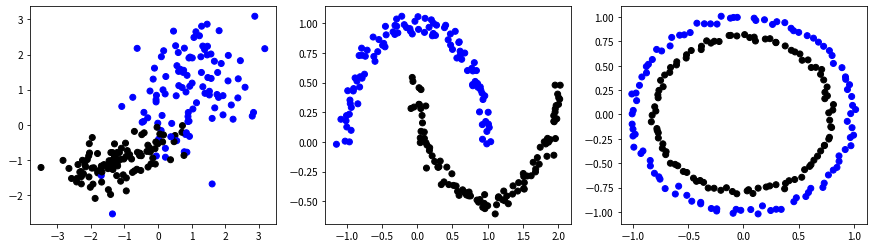

In [3]:
plt.figure(figsize=(15, 4))

from matplotlib.colors import ListedColormap
cmap = ListedColormap(['#0000FF', '#000000'])

for i, data in enumerate(DataList):
  X, y = data
  ax = plt.subplot(1, N, i+1)
  ax.scatter(X[:,0], X[:,1], c=y, cmap=cmap)

plt.show()

# Logistic Regression

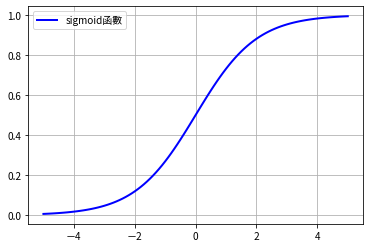

In [4]:
def sigmoid(x):
  return 1/(1 + np.exp(-x))

x = np.linspace(-5, 5, 101)

y = sigmoid(x)

plt.plot(x, y, label='sigmoid函數', c='b', lw=2)

plt.legend()

plt.grid()

plt.show()

In [6]:
from sklearn.model_selection import train_test_split

# 決定境界の表示関数
def plot_boundary(ax, x, y, algorithm):
    x_train, x_test, y_train, y_test = train_test_split(x, y,
            test_size=0.5, random_state=random_seed)
    # カラーマップ定義
    from matplotlib.colors import ListedColormap
    cmap1 = plt.cm.bwr
    cmap2 = ListedColormap(['#0000FF', '#000000'])

    h = 0.005
    algorithm.fit(x_train, y_train)
    score_test = algorithm.score(x_test, y_test)
    score_train = algorithm.score(x_train, y_train)
    f1_min = x[:, 0].min() - 0.5
    f1_max = x[:, 0].max() + 0.5
    f2_min = x[:, 1].min() - 0.5
    f2_max = x[:, 1].max() + 0.5
    f1, f2 = np.meshgrid(np.arange(f1_min, f1_max, h), 
                         np.arange(f2_min, f2_max, h))
    if hasattr(algorithm, "decision_function"):
        Z = algorithm.decision_function(np.c_[f1.ravel(), f2.ravel()])
        Z = Z.reshape(f1.shape)
        ax.contour(f1, f2, Z, levels=[0], linewidth=2)
    else:
        Z = algorithm.predict_proba(np.c_[f1.ravel(), f2.ravel()])[:, 1]
        Z = Z.reshape(f1.shape)
    ax.contourf(f1, f2, Z, cmap=cmap1, alpha=0.3)
    ax.scatter(x_test[:,0], x_test[:,1], c=y_test, cmap=cmap2)
    ax.scatter(x_train[:,0], x_train[:,1], c=y_train, cmap=cmap2, marker='x')
    text = f'検証:{score_test:.2f}  訓練: {score_train:.2f}'
    ax.text(f1.max() - 0.3, f2.min() + 0.3, text, horizontalalignment='right',
    fontsize=18) 

def plot_boundaries(algorithm, DataList):
    plt.figure(figsize=(15,4))
    for i, data in enumerate(DataList):
        X, y = data
        ax = plt.subplot(1, N, i+1)
        plot_boundary(ax, X, y, algorithm)
    plt.show()

{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': 123, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


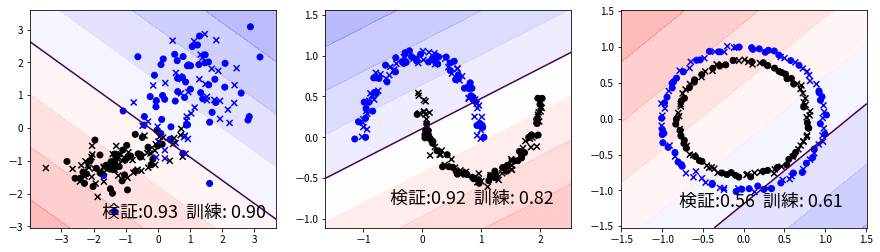

In [7]:
from sklearn.linear_model import LogisticRegression

algorithm = LogisticRegression(random_state=random_seed)
print(algorithm.get_params())

plot_boundaries(algorithm, DataList)